In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from patsy import dmatrices # 可根据离散变量自动生成哑变量
from sklearn.linear_model import LogisticRegression # sk-learn库Logistic Regression模型
from sklearn.model_selection import train_test_split, cross_val_score # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

> 从../input/HR_comma_sep.csv文件中读入数据，存入data

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.left = data.left.astype(int)

观察离职人数与工资分布的关系

In [5]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

观察离职比例与工资分布的关系

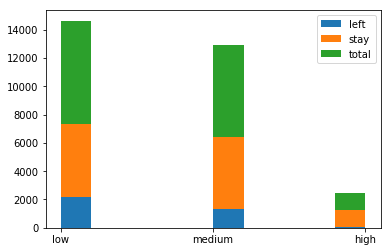

In [6]:
plt.hist([data[data['left']==1].salary, data[data['left']==0].salary, data.salary], stacked='True')
legend=('left','stay','total')
plt.legend(legend)
plt.show()

(array([895.,  19.,  11.,   9.,  11.,  30., 451., 549., 556.,  19.,  19.,
         20.,  19.,  19.,  15., 161., 191., 184., 197., 196.]),
 array([0.09  , 0.1315, 0.173 , 0.2145, 0.256 , 0.2975, 0.339 , 0.3805,
        0.422 , 0.4635, 0.505 , 0.5465, 0.588 , 0.6295, 0.671 , 0.7125,
        0.754 , 0.7955, 0.837 , 0.8785, 0.92  ]),
 <a list of 20 Patch objects>)

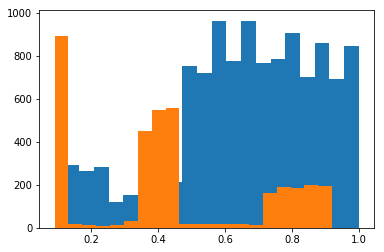

In [7]:
#观察员工满意度的分布图(histogram)
plt.hist(data[data['left']==0].satisfaction_level, bins=20)
plt.hist(data[data['left']==1].satisfaction_level, bins=20)



dmatrices将数据中的离散变量变成哑变量，并指明用satisfaction_level, last_evaluation, ... 来预测left

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
y,X=dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', data, return_type='dataframe')

In [9]:
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'DeprecationWarningartment: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'}) 
y = np.ravel(y) # 将y变成np的一维数组

In [10]:
X.head()

,Intercept,Department: Random,Department: Accounting,Department: HR,Department: Management,Department: Marketing,Department: Product_Management,Department: Sales,Department: Support,DeprecationWarningartment: Technical,Salary: Low,Salary: Medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0


用X和y训练模型，然后输出X中每一项自变量对于y的影响
zip(a,b)可将a的每一个元素和b里对应位置的元素组成一对

C:\Users\chongyue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

model.score为准确率(0到1之间)

In [12]:
print(model.score(X,y))
model.coef_

0.7992532835522368


array([[-0.33276053, -0.4910888 ,  0.12398471,  0.39325274, -0.61938493,
         0.05159672, -0.05968804,  0.08427343,  0.25549732,  0.25381764,
         1.43095976,  0.93800344, -4.33665007,  0.15548464, -0.30351817,
         0.00452059,  0.26885225, -1.78697593, -0.65908567]])

预测这样一个人的离职概率：
一个高工资HR，
对公司满意度0.5, 
上次评审0.7分，
做过4个项目，
每月平均工作160小时，
在公司呆了3年，
过去5年没有被晋升，
没有工伤

In [13]:
pred_test=model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0, 0.5,0.7,4,160,3,0,0]])
pred_test

array([[0.88329592, 0.11670408]])

In [14]:
model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0, 0.5, 0.7, 4.0, 160, 3.0, 0, 0]])


array([[0.88329592, 0.11670408]])

In [15]:
model.predict_proba(X)
pred = model.predict(X)
1-(abs(pred-y)).sum() / len(y)

0.7992532835522368

生成7:3的训练测试集并在训练集上训练模型model2

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
model2 = LogisticRegression(C=0.0001)# regularzation, C=1/R
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
print(np.sum(model2.coef_))
metrics.accuracy_score(y_test, pred)


0.008820751667806787


0.7614141414141414

用metrics观察实际离职/未离职被预测成为离职/未离职的数目

In [18]:
y_test.shape

(4950,)

In [19]:
print(metrics.classification_report(y_test, pred))


              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      3769
         1.0       0.00      0.00      0.00      1181

    accuracy                           0.76      4950
   macro avg       0.38      0.50      0.43      4950
weighted avg       0.58      0.76      0.66      4950



C:\Users\chongyue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10份的交叉验证Cross Validation

In [20]:
print(cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10))

C:\Users\chongyue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\chongyue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

[0.81266667 0.796      0.79933333 0.79333333 0.80866667 0.82133333
 0.80133333 0.79533333 0.75066667 0.74116077]


C:\Users\chongyue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\chongyue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l